<a href="https://colab.research.google.com/github/chaos44/signate_competition/blob/main/ames_kaggle_scaled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/mchatham/ames-housing-regression/comments

In [233]:
!git clone https://github.com/chaos44/signate_competition

Cloning into 'signate_competition'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 27 (delta 3), reused 7 (delta 1), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [234]:
cd signate_competition/ams_beginner/

/content/signate_competition/ams_beginner/signate_competition/ams_beginner/signate_competition/ams_beginner


In [235]:
ls

data_description.txt  sample_submit.csv  test.csv  train.csv


## データ確認

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [283]:
train = pd.read_csv('train.csv')
test =  pd.read_csv('test.csv')

In [284]:
print(train.shape)
print(test.shape)

(3000, 47)
(2000, 46)


In [285]:
test['SalePrice'] = np.nan
df = pd.concat([train, test], axis=0)
train_ids = train['index']
test_ids = test['index']

In [286]:
df.head()

,index,Order,MS SubClass,MS Zoning,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Exter Qual,Foundation,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,200,2163,20,RL,9000,Reg,Lvl,Inside,NAmes,1Fam,1Story,5,5,1963,1950,Gable,VinylSd,VinylSd,TA,CBlock,554.725259,490.862838,620.339061,Ex,Y,SBrkr,941,0,2358,1.001999,2,0,3,1,TA,5,0,1.998003,381.014258,Y,0,0,7,2007,WD,Normal,158000.0
1,3832,1862,20,RL,9600,Reg,Lvl,Inside,CollgCr,1Fam,1Story,7,5,2006,2006,Gable,VinylSd,VinylSd,Gd,PConc,514.217911,1711.943709,1286.011022,Ex,Y,SBrkr,894,0,1040,0.002000,2,0,3,1,Gd,6,0,1.998003,384.114652,Y,0,0,11,2007,WD,Normal,145000.0
2,4927,754,20,RL,9600,Reg,Lvl,Inside,NridgHt,1Fam,1Story,9,5,2007,2007,Hip,VinylSd,VinylSd,Gd,PConc,1596.991227,511.217197,1341.741207,Ex,Y,SBrkr,864,0,864,1.001999,2,0,3,1,Gd,7,1,2.998015,625.140330,Y,0,0,5,2008,WD,Normal,125000.0
3,4088,641,80,RL,9600,Reg,Lvl,Inside,OldTown,1Fam,SLvl,6,6,1976,1950,Gable,VinylSd,Plywood,TA,CBlock,586.182353,469.685845,566.069609,Gd,Y,SBrkr,864,0,864,0.002000,1,0,3,1,TA,6,0,0.998002,193.156275,Y,0,0,7,2006,WD,Normal,135000.0
4,3644,754,20,RL,9600,Reg,Lvl,Inside,NoRidge,1Fam,1Story,7,5,1994,2002,Gable,VinylSd,VinylSd,Gd,PConc,1589.946047,484.337352,1258.013116,Ex,Y,SBrkr,832,0,1040,1.001998,2,0,3,1,Gd,7,1,2.998012,617.903766,Y,0,0,7,2007,WD,Normal,175000.0


In [287]:
df.shape

(5000, 47)

In [288]:
print('Data from years {} to {}.'.format(df['Yr Sold'].min(), df['Yr Sold'].max()))

Data from years 2006 to 2010.



Some info about Ames, Iowa

    Population: 66,191 in 2016, in the top ten for the state of Iowa.
    Density: 2,436/mi2

    Major employers: State/federal agencies
    Ranked in the top 15 "Cities that have done the best since the recession" by Bloomberg
    Unemployment: Ranked along with Boulder, CO as lowest unemployment rate in 2016.

Ames is a moderately-sized town smack-dab in the middle of Iowa, containing Iowa State University (ISU) and nestled between the state's major east-west and north-south highways. ISU employs almost 16,000 of the states 66,00 residents. The Iowa DoT is located in the city. Finally, Ames sees a lot of political activity by virtue of its being in Iowa. According to Wikipedia, the Ames Straw Poll was held in the city from 1979 through 2011 before being cancelled.

In [289]:
sns.set()
df.columns

Index(['index', 'Order', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Exter Qual', 'Foundation', 'BsmtFin SF 1', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', 'Central Air', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition', 'SalePrice'],
      dtype='object')

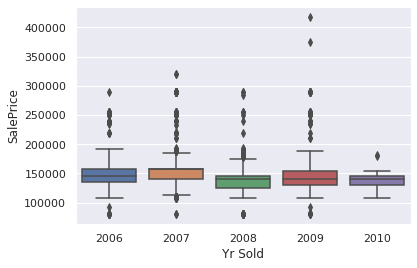

In [290]:
sns.boxplot(x=df['Yr Sold'], y=df['SalePrice'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


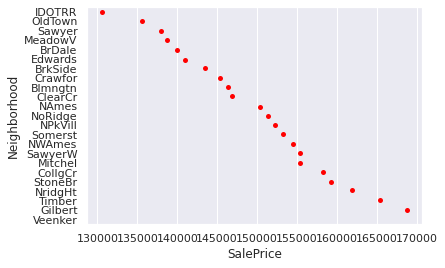

In [291]:
data = pd.concat(
    [
        df.groupby('Neighborhood').mean()['SalePrice'],
        df.groupby('Neighborhood').count()['index']
    ], 
    
    axis=1)
f, ax = plt.subplots()
sns.stripplot(data.sort_values(by='SalePrice').SalePrice, data.sort_values(by='SalePrice').index, orient='h', color='red');
# sns.stripplot(data.sort_values(by='Id').Id, data.sort_values(by='Id').index, orient='h', color='red')

Interestingly, I see four clusters of neighborhoods above.

    Neighborhood 1: MeadowV:BrDale
    Neighborhood 2: BrkSide:Mitchel
    Neighborhood 3: SawyerW:Veenker
    Neighborhood 4: Timber:NoRidge


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


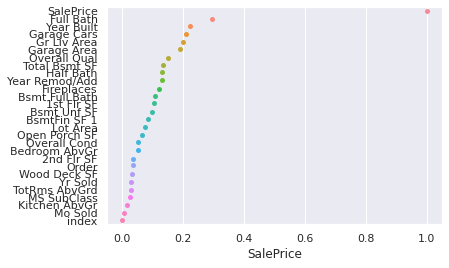

In [292]:
sorted_corrs = df.corr()['SalePrice'].apply(np.abs).sort_values(ascending=False)
sns.stripplot(sorted_corrs, sorted_corrs.index, orient='h');

In [293]:
from sklearn. preprocessing import LabelEncoder

categories = df.columns[df.dtypes == "object"]
categories

Index(['MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config', 'Neighborhood',
       'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Foundation', 'Heating QC', 'Central Air',
       'Electrical', 'Kitchen Qual', 'Paved Drive', 'Sale Type',
       'Sale Condition'],
      dtype='object')

In [294]:
for cat in categories: 
    le = LabelEncoder() 
    print(cat) 
    if df[cat].dtypes == "object": 
        le = le. fit(df[cat])
        df[cat] = le.transform(df[cat])

MS Zoning
Lot Shape
Land Contour
Lot Config
Neighborhood
Bldg Type
House Style
Roof Style
Exterior 1st
Exterior 2nd
Exter Qual
Foundation
Heating QC
Central Air
Electrical
Kitchen Qual
Paved Drive
Sale Type
Sale Condition


In [345]:
train_df_le = df[~df["SalePrice"].isnull()]
test_df_le = df[df["SalePrice"].isnull()]

In [346]:
# データの正規化 no3794
# from sklearn import preprocessing

# train_df_le_scale = preprocessing.scale(train_df_le_tmp.drop(['index', 'Order'], axis = 1))
# test_df_le_scale = preprocessing.scale(test_df_le_tmp.drop(['index', 'Order'], axis = 1))

In [347]:
# np.array形式をDataFrame形式に戻す処理
# train_df_le = pd.DataFrame(train_df_le_scale)
# train_df_le.columns = train_df_le_tmp.drop(['index', 'Order'], axis = 1).columns

# test_df_le = pd.DataFrame(test_df_le_scale)
# test_df_le.columns = test_df_le_tmp.drop(['index', 'Order'], axis = 1).columns

In [348]:
import lightgbm as lgb

In [349]:
from sklearn.model_selection import KFold 
folds = 3 
kf = KFold(n_splits = folds)

In [350]:
lgbm_params = { "objective" :"regression", "random_SEED" : 1234 }
# コンペの評価基準はrmseなので、rmseを使うことで点数は上がるかどうかは要テスト
# lgbm_params = { "metric" :"rmse", "random_SEED" : 4321 }

In [351]:
train_df_le

,index,Order,MS SubClass,MS Zoning,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Exter Qual,Foundation,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,200,2163,20,1,9000,1,2,2,11,0,1,5,5,1963,1950,0,6,7,2,1,554.725259,490.862838,620.339061,0,1,2,941,0,2358,1.001999,2,0,3,1,3,5,0,1.998003,381.014258,1,0,0,7,2007,1,0,158000.0
1,3832,1862,20,1,9600,1,2,2,4,0,1,7,5,2006,2006,0,6,7,1,2,514.217911,1711.943709,1286.011022,0,1,2,894,0,1040,0.002000,2,0,3,1,2,6,0,1.998003,384.114652,1,0,0,11,2007,1,0,145000.0
2,4927,754,20,1,9600,1,2,2,15,0,1,9,5,2007,2007,1,6,7,1,2,1596.991227,511.217197,1341.741207,0,1,2,864,0,864,1.001999,2,0,3,1,2,7,1,2.998015,625.140330,1,0,0,5,2008,1,0,125000.0
3,4088,641,80,1,9600,1,2,2,16,0,4,6,6,1976,1950,0,6,5,2,1,586.182353,469.685845,566.069609,1,1,2,864,0,864,0.002000,1,0,3,1,3,6,0,0.998002,193.156275,1,0,0,7,2006,1,0,135000.0
4,3644,754,20,1,9600,1,2,2,14,0,1,7,5,1994,2002,0,6,7,1,2,1589.946047,484.337352,1258.013116,0,1,2,832,0,1040,1.001998,2,0,3,1,2,7,1,2.998012,617.903766,1,0,0,7,2007,1,0,175000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4931,27,120,1,1680,1,2,2,15,4,1,5,5,2004,2004,0,6,7,2,2,620.110745,511.080630,1163.794125,0,1,2,1337,0,1728,0.002000,2,0,3,1,3,6,0,1.998001,416.886419,1,0,0,5,2009,1,0,130000.0
2996,3264,2203,160,1,2665,1,2,2,9,0,2,5,5,1970,1970,0,1,4,2,2,0.001057,480.872842,543.789909,0,1,2,1040,0,1040,0.001999,1,1,3,1,3,6,0,1.998004,371.721904,1,0,0,5,2006,1,0,140000.0
2997,1653,2447,20,1,7200,1,2,2,11,0,1,5,5,1963,1950,0,6,7,2,1,554.523591,488.283374,621.223013,0,1,2,1098,0,2358,1.001999,2,0,3,1,3,5,0,1.998003,379.306321,1,0,0,7,2007,1,0,158000.0
2998,2607,378,60,0,9000,1,2,2,19,0,2,6,5,2005,1950,0,6,7,1,2,0.000872,504.687298,599.525621,0,1,2,728,0,1456,0.001999,2,1,3,1,3,7,1,1.998002,371.138581,1,0,0,7,2007,1,0,158000.0


Index(['index', 'Order', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Exter Qual', 'Foundation', 'BsmtFin SF 1', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', 'Central Air', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition', 'SalePrice'],
      dtype='object')

In [352]:
# 重要度30以下の項目を削除して訓練する
drop_array = ['SalePrice', 'index', 'Order', 'Overall Qual', 'Year Remod/Add', 'MS SubClass', 'Yr Sold', 'Mo Sold', 'Exterior 2nd', 'Full Bath', 'House Style',  'Exter Qual', 'Exterior 1st', 'Fireplaces', 'Heating QC', 'TotRms AbvGrd', 'Foundation', 'Lot Shape', 'Kitchen Qual', 'Overall Cond',  'Bldg Type', 'Half Bath', 'MS Zoning', 'Roof Style', 'Sale Type', 'Bedroom AbvGr']
train_X = train_df_le.drop(drop_array, axis = 1) 
train_Y = train_df_le['SalePrice']

In [353]:
# train_X = train_df_le.drop(['SalePrice'], axis = 1) 
# train_Y = train_df_le['SalePrice']

In [354]:
from sklearn.metrics import mean_squared_error

In [355]:
models = []
rmses = []
oof = np.zeros(len(train_X)) 
for train_index, val_index in kf.split(train_X): 
    X_train = train_X. iloc[train_index]
    X_valid = train_X. iloc[val_index] 
    y_train = train_Y.iloc[train_index] 
    y_valid = train_Y.iloc[val_index] 
    lgb_train = lgb.Dataset(X_train, y_train) 
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train) 
    model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets = lgb_eval, num_boost_round = 100, early_stopping_rounds = 20, verbose_eval = 10, ) 
    y_pred = model_lgb. predict(X_valid, num_iteration = model_lgb. best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred))) 
    print(tmp_rmse) 
    models.append(model_lgb) 
    rmses.append(tmp_rmse) 
    oof[val_index] = y_pred

Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 8.73712e+08
[20]	valid_0's l2: 8.40607e+08
[30]	valid_0's l2: 8.43175e+08
[40]	valid_0's l2: 8.49426e+08
Early stopping, best iteration is:
[27]	valid_0's l2: 8.37657e+08
0.17314436079055506
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 6.61031e+08
[20]	valid_0's l2: 6.52981e+08
[30]	valid_0's l2: 6.60242e+08
Early stopping, best iteration is:
[19]	valid_0's l2: 6.50529e+08
0.156051504577714
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.60552e+08
[20]	valid_0's l2: 9.47073e+08
[30]	valid_0's l2: 9.4913e+08
Early stopping, best iteration is:
[16]	valid_0's l2: 9.44785e+08
0.1770211236038198


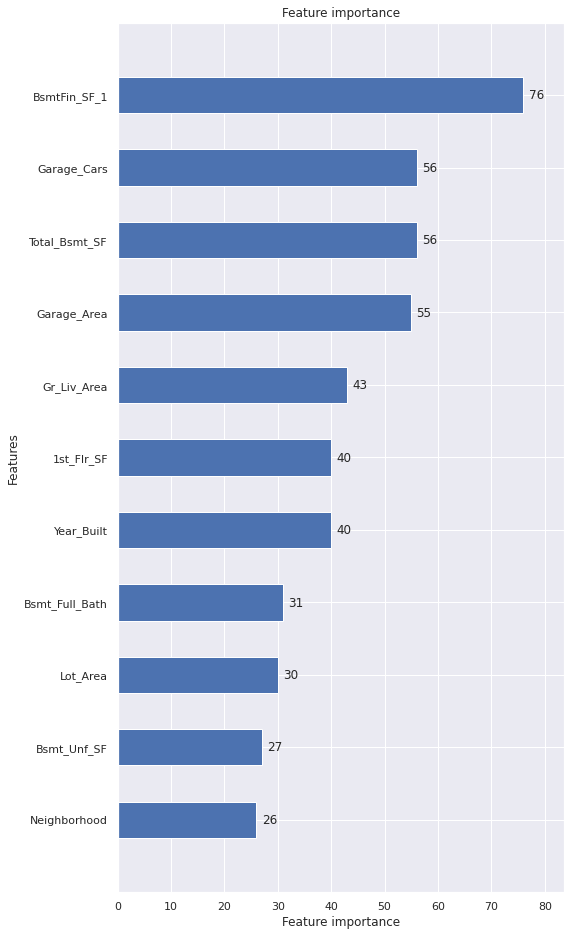

In [356]:
# 特徴量の重要度を確認
lgb.plot_importance(model_lgb, height = 0.5, figsize = (8,16))

In [357]:
# 重要度11以下の項目を削除して予測する
test_X = test_df_le.drop(drop_array, axis = 1)
preds = []

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)
    preds_array=np.array(preds)
    preds_mean=np.mean(preds_array,axis=0)
    
test_df_le['pred_1'] = preds[0]
test_df_le['pred_2'] = preds[1]
test_df_le['pred_3'] = preds[2]
test_df_le["pred_mean"] = preds_mean

test_df_le.to_csv("./test_pred_goal_yeah4.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead